# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | egilsstadir
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | chernyshevskiy
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | perryville
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | rio grande
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | chinchilla
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | pahrump
Processing Record 16 of Set 1 | vanino
Processing Record 17 of Set 1 | flin flon
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | anta
Processing Record 21 of Set 1 | hawaiian paradise park
Processing R

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,egilsstadir,65.2653,-14.3948,-2.05,69,75,4.12,IS,1701997233
1,chernyshevskiy,63.0128,112.4714,-37.09,100,98,0.67,RU,1701997235
2,bredasdorp,-34.5322,20.0403,17.43,79,0,3.34,ZA,1701997236
3,grytviken,-54.2811,-36.5092,-0.78,94,100,7.20,GS,1701997238
4,port mathurin,-19.6833,63.4167,25.95,74,0,3.05,MU,1701997241


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egilsstadir,65.2653,-14.3948,-2.05,69,75,4.12,IS,1701997233
1,chernyshevskiy,63.0128,112.4714,-37.09,100,98,0.67,RU,1701997235
2,bredasdorp,-34.5322,20.0403,17.43,79,0,3.34,ZA,1701997236
3,grytviken,-54.2811,-36.5092,-0.78,94,100,7.20,GS,1701997238
4,port mathurin,-19.6833,63.4167,25.95,74,0,3.05,MU,1701997241


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

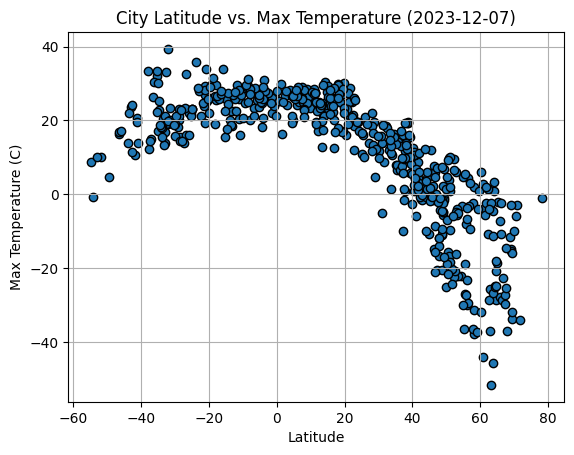

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-12-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

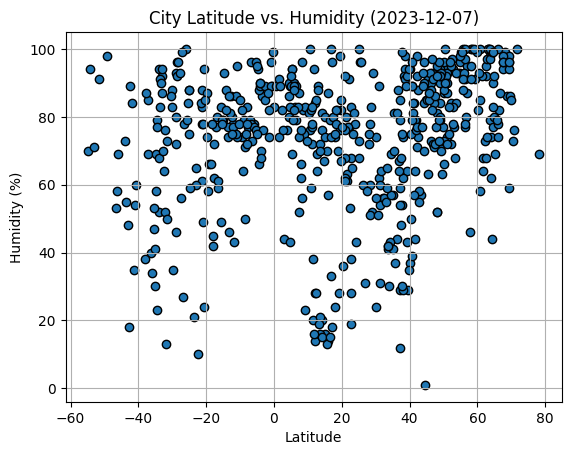

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-12-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

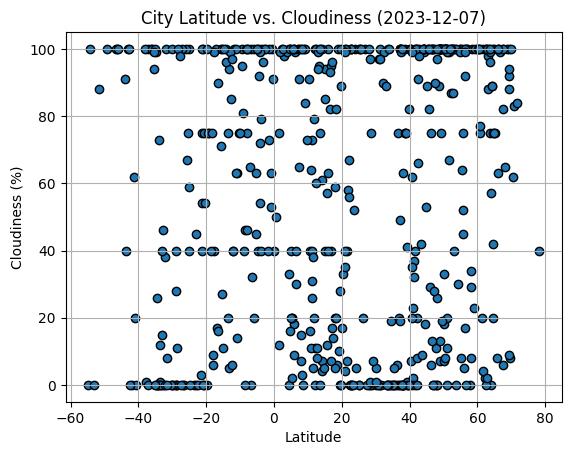

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-12-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

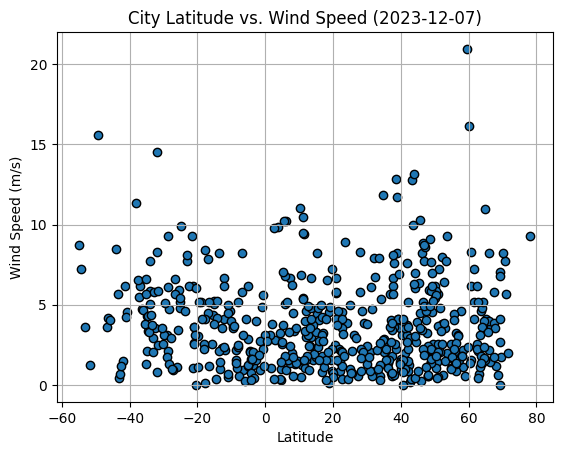

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-12-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def linReg(x, y, xText, yText):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    fit = slope * x + intercept 

    print(f'The r-value is {abs(rvalue)}')

    plt.scatter(x, y)
    plt.text(xText, yText, s=f"y = {round(slope, 2)}x + {round(intercept, 2)}", fontsize="x-large")
    plt.plot(x, fit, color="Red")

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query("Lat >=0")

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egilsstadir,65.2653,-14.3948,-2.05,69,75,4.12,IS,1701997233
1,chernyshevskiy,63.0128,112.4714,-37.09,100,98,0.67,RU,1701997235
5,perryville,37.7242,-89.8612,11.62,54,0,6.69,US,1701997223
6,colonia,50.9333,6.9500,3.82,74,0,5.66,DE,1701997244
8,yellowknife,62.4560,-114.3525,-10.71,92,100,2.57,CA,1701996960


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query("Lat < 0")

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,17.43,79,0,3.34,ZA,1701997236
3,grytviken,-54.2811,-36.5092,-0.78,94,100,7.20,GS,1701997238
4,port mathurin,-19.6833,63.4167,25.95,74,0,3.05,MU,1701997241
7,rio grande,-32.0350,-52.0986,19.06,76,38,8.28,BR,1701997082
10,chinchilla,-26.7500,150.6333,32.45,27,0,6.59,AU,1701997250


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.8536508708280887


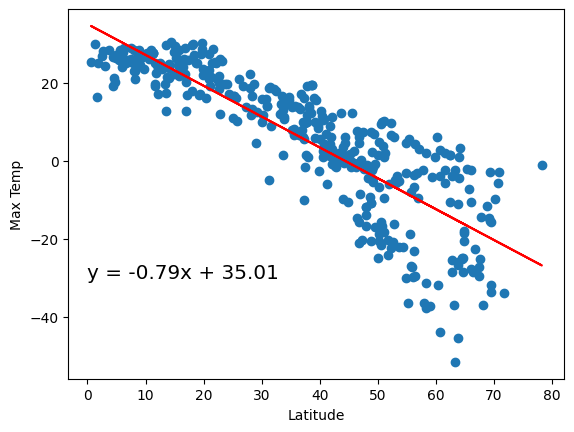

In [54]:
# Linear regression on Northern Hemisphere
linReg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0, -30)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is 0.5182542087123306


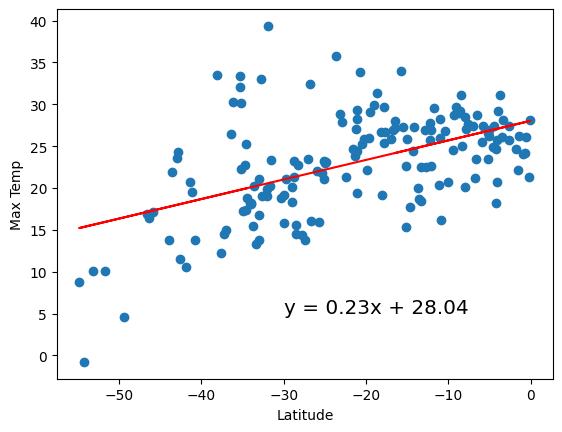

In [58]:
# Linear regression on Southern Hemisphere
linReg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -30, 5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 

In both the northern and southern hemisphere, as you get closer to the poles, temperature decreases.

This relationship is stronger in the north, as there are more cities closer to the north pole compared to the south pole.

The furthest north city lies at ~80 lat, while the furthest south city lies at -55 lat

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.329500798498853


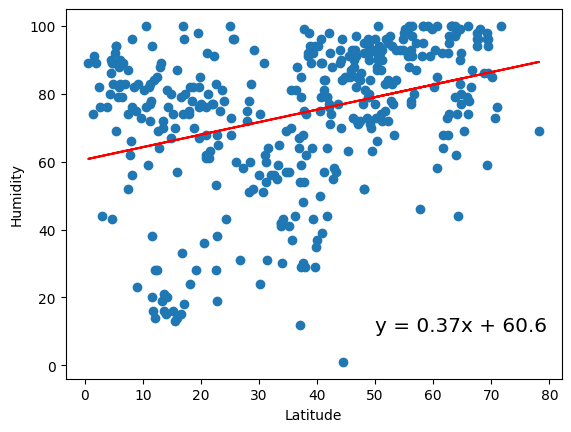

In [61]:
# Northern Hemisphere
linReg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 50, 10)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is 0.27728941604102675


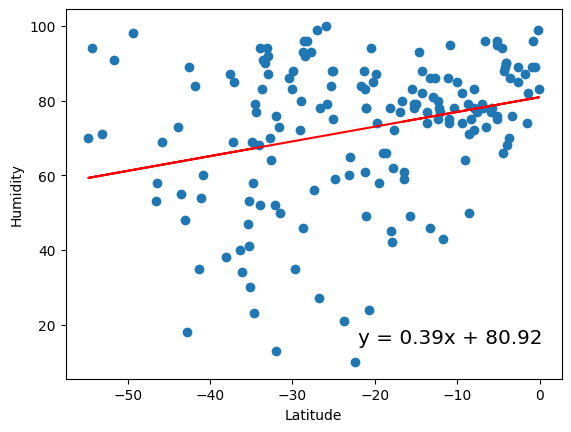

In [66]:
# Southern Hemisphere
linReg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -22, 15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere cities closer to the equator can have any range of humidity, 
while cities closer to the north pole only have higher humidity values.

There are no other correlations or relationships that can be identified.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.16065480449196445


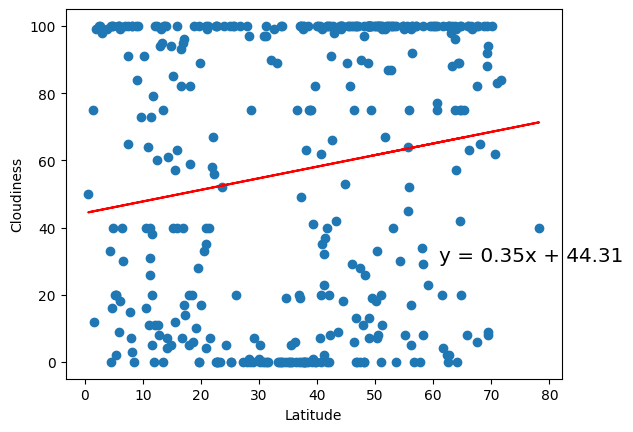

In [73]:
# Northern Hemisphere
linReg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 61, 30)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is 0.2316171109262655


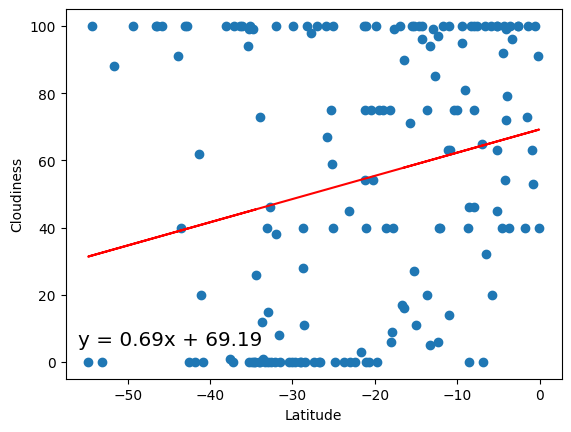

In [81]:
# Southern Hemisphere
linReg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -56, 5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

There is no observable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.05101872782386857


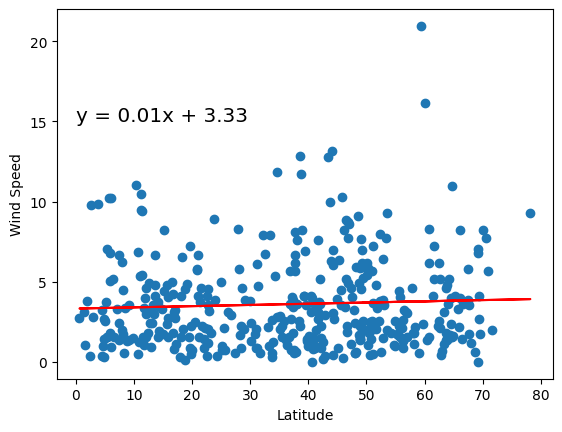

In [83]:
# Northern Hemisphere
linReg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0, 15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is 0.33212514199748694


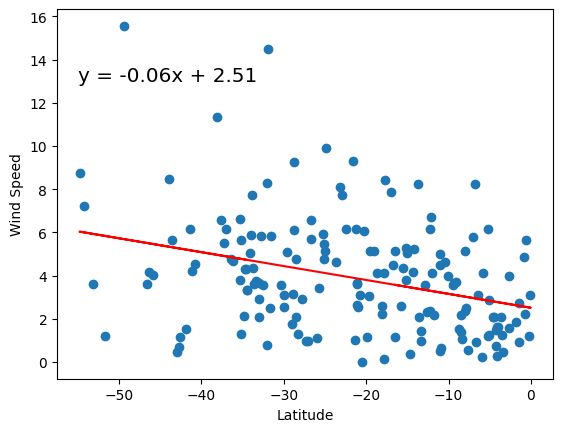

In [85]:
# Southern Hemisphere
linReg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -55, 13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 

There is no correlation between wind speed and latitude in the northern hemisphere.

In the southern hemisphere, there is a slight higher possibility of greater wind speed towards the southern pole. 